# HCPC with PCA

In [1]:
import pandas as pd
import numpy as np
from scientisttools.clustering import HCPC
from scientisttools.pyplot import plot_dendrogram,plotHCPC
from scientisttools.decomposition import PCA

In [2]:
# Analyse en composantes principales
href = "https://eric.univ-lyon2.fr/ricco/tanagra/fichiers/autos_caracterisation.txt"
autos = pd.read_csv(href,sep="\t",index_col=0)
display(autos.head())

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids,CO2,prix,origine,carburant
Modele,,,,,,,,,,,
PANDA,54,1108,150,354,159,154,860,135,8070,Europe,Essence
TWINGO,60,1149,151,344,163,143,840,143,8950,France,Essence
CITRONC2,61,1124,158,367,166,147,932,141,10700,France,Essence
YARIS,65,998,155,364,166,150,880,134,10450,Autres,Essence
FIESTA,68,1399,164,392,168,144,1138,117,14150,Europe,Diesel


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, PANDA        to ALFA 156    
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   puissance  30 non-null     int64 
 1   cylindree  30 non-null     int64 
 2   vitesse    30 non-null     int64 
 3   longueur   30 non-null     int64 
 4   largeur    30 non-null     int64 
 5   hauteur    30 non-null     int64 
 6   poids      30 non-null     int64 
 7   CO2        30 non-null     int64 
 8   prix       30 non-null     int64 
 9   origine    30 non-null     object
 10  carburant  30 non-null     object
dtypes: int64(9), object(2)
memory usage: 2.8+ KB


In [4]:
acp = PCA(row_labels=autos.index,
          col_labels=autos.columns[:7],
          quanti_sup_labels=["CO2","prix"],
          quali_sup_labels=["origine","carburant"],
          parallelize=False)

#Instanciation
acp.fit(autos)

PCA(col_labels=Index(['puissance', 'cylindree', 'vitesse', 'longueur', 'largeur', 'hauteur',
       'poids'],
      dtype='object'),
    quali_sup_labels=['origine', 'carburant'],
    quanti_sup_labels=['CO2', 'prix'],
    row_labels=Index(['PANDA       ', 'TWINGO      ', 'CITRONC2    ', 'YARIS       ',
       'FIESTA      ', 'CORSA       ', 'GOLF        ', 'P1007       ',
       'MUSA        ', 'CLIO        ', 'AUDIA3      ', 'MODUS       ',
       'AVENSIS     ', 'P407        ', 'CITRONC4    ', 'MERC_A      ',
       'MONDEO      ', 'VECTRA      ', 'PASSAT      ', 'VELSATIS    ',
       'LAGUNA      ', 'MEGANECC      ', 'P307CC      ', 'P607        ',
       'MERC_E      ', 'CITRONC5    ', 'PTCRUISER   ', 'MAZDARX8    ',
       'BMW530      ', 'ALFA 156    '],
      dtype='object', name='Modele'))

In [5]:
hcpc =HCPC(n_clusters=4,
           min_clusters=2,
           max_clusters=8,
           parallelize=False)
hcpc.fit(acp)

HCPC(n_clusters=4)

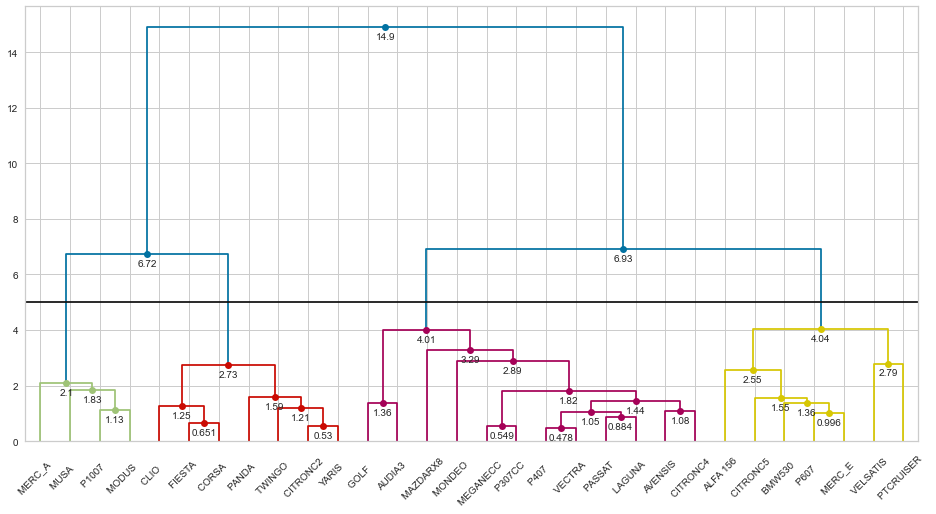

In [6]:
# Plot dendodgram
import matplotlib.pyplot as plt
fig,axe = plt.subplots(figsize=(16,8))
plot_dendrogram(hcpc,ax=axe,max_d=5)
plt.show()

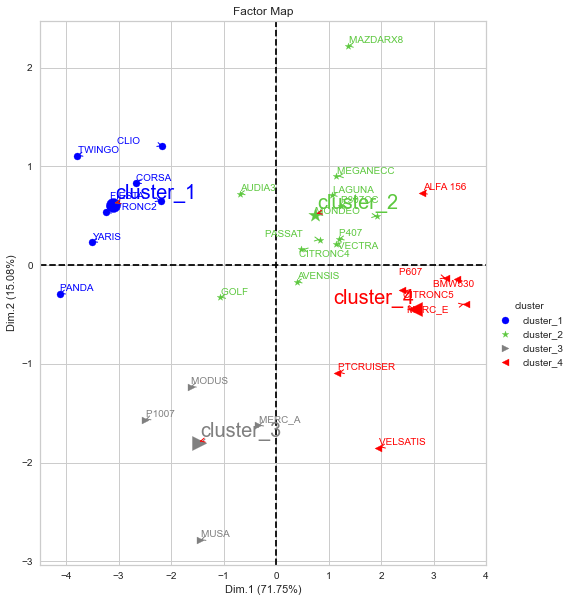

In [7]:
fig,axe = plt.subplots(figsize=(10,10))
plotHCPC(hcpc,ax=axe,
         color=["blue",'#5DC83F','gray','red'],
         marker=['o',"*",'>','<'],
         title="Factor Map",
         show_clust_cent=True,
         center_marker_size=200)
plt.show()

C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_point : Removed 30 rows containing missing values.
C:\Users\duver\AppData\Roaming\Python\Python310\site-packages\plotnine\guides\guides.py:253: PlotnineWarning: geom_point legend : Removed 4 rows containing missing values.


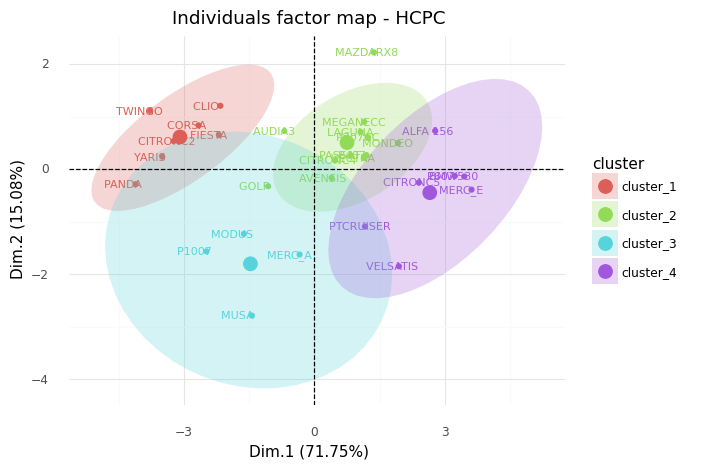

In [8]:
from scientisttools.ggplot import fviz_hcpc_cluster
p = fviz_hcpc_cluster(hcpc,
                  repel=False,
                  show_clust_cent=True,
                  center_marker_size=5)
print(p)

In [9]:
Xmean=hcpc.gmean_
Xmean

,cluster_1,cluster_2,cluster_3,cluster_4
puissance,68.285714,146.000000,107.00,210.285714
cylindree,1212.428571,1878.583333,1714.75,2744.857143
vitesse,161.142857,209.833333,183.25,229.000000
longueur,369.571429,448.000000,384.25,470.142857
largeur,164.428571,178.916667,171.50,180.285714
hauteur,146.285714,144.000000,162.25,148.428571
poids,952.142857,1366.583333,1241.50,1611.714286


In [10]:
active_data= autos[autos.columns[:7]]
means = active_data.mean(axis=0)
std = active_data.std(ddof=1,axis=0)
n_rows, n_cols = active_data.shape

In [11]:
hcpc.cluster_infos_

,n(k),p(k)
cluster,,
cluster_1,7,0.233333
cluster_2,12,0.400000
cluster_3,4,0.133333
cluster_4,7,0.233333


In [12]:
hcpc.cluster_centers_

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7
cluster,,,,,,,
cluster_1,-3.097315,0.610998,-0.137234,-0.157944,0.068859,0.006974,-0.022314
cluster_2,0.749909,0.504722,0.426740,0.103676,-0.001338,0.038316,0.031349
cluster_3,-1.474254,-1.800563,-0.264118,0.313724,-0.340969,-0.016792,0.119213
cluster_4,2.654188,-0.447342,-0.443396,-0.199057,0.128274,-0.063064,-0.099550


In [13]:
hcpc.desc_var_quanti_

vtest    pvalue  mean in category  overall mean  \
cluster_1 hauteur   -0.703561  0.481706        146.285714    148.000000   
          cylindree -3.497579  0.000470       1212.428571   1903.433333   
          puissance -3.537241  0.000404         68.285714    137.666667   
          vitesse   -3.757306  0.000172        161.142857    199.400000   
          longueur  -3.814468  0.000136        369.571429    426.366667   
          largeur   -4.019667  0.000058        164.428571    174.866667   
          poids     -4.281878  0.000019        952.142857   1310.400000   
cluster_2 largeur    2.308305  0.020982        178.916667    174.866667   
          longueur   2.150378  0.031525        448.000000    426.366667   
          vitesse    1.516549  0.129381        209.833333    199.400000   
          poids      0.993839  0.320301       1366.583333   1310.400000   
          puissance  0.628800  0.529480        146.000000    137.666667   
          cylindree -0.186158  0.852321       1878.583333   1903.433333   
          hauteur   -2.429672  0.015112        144.000000    148.000000   
cluster_3 hauteur    4.158068  0.000032        162.250000    148.000000   
          poids     -0.585486  0.558221       1241.500000   1310.400000   
          cylindree -0.679013  0.497130       1714.750000   1903.433333   
          largeur   -0.921780  0.356643        171.500000    174.866667   
          puissance -1.111602  0.266309        107.000000    137.666667   
          vitesse   -1.127703  0.259445        183.250000    199.400000   
          longueur  -2.011103  0.044315        384.250000    426.366667   
cluster_4 cylindree  4.258937  0.000021       2744.857143   1903.433333   
          puissance  3.702329  0.000214        210.285714    137.666667   
          poids      3.601298  0.000317       1611.714286   1310.400000   
          longueur   2.940086  0.003281        470.142857    426.366667   
          vitesse    2.907072  0.003648        229.000000    199.400000   
          largeur    2.086853  0.036901        180.285714    174.866667   
          hauteur    0.175890  0.860380        148.428571    148.000000   

                     sd in categorie  overall sd significant  
cluster_1 hauteur           4.025429    7.238784              
          cylindree       154.267724  586.945351         ***  
          puissance        13.863769   58.271968         ***  
          vitesse          11.128195   30.249628         ***  
          longueur         16.034402   44.234589         ***  
          largeur           2.664965    7.714633         ***  
          poids            99.182989  248.567710         ***  
cluster_2 largeur           4.906770    7.714633          **  
          longueur         19.048185   44.234589          **  
          vitesse          19.160869   30.249628              
          poids            79.787696  248.567710              
          puissance        37.901187   58.271968              
          cylindree       208.792344  586.945351              
          hauteur           3.785939    7.238784          **  
cluster_3 hauteur           3.960745    7.238784         ***  
          poids            69.994643  248.567710              
          cylindree       251.949772  586.945351              
          largeur           3.201562    7.714633              
          puissance        23.441416   58.271968              
          vitesse          13.122023   30.249628              
          longueur          9.229707   44.234589          **  
cluster_4 cylindree       367.097273  586.945351         ***  
          puissance        28.986274   58.271968         ***  
          poids           118.254827  248.567710         ***  
          longueur         22.363418   44.234589          **  
          vitesse          19.863822   30.249628          **  
          largeur           5.283783    7.714633          **  
          hauteur           5.314593    7.238784

In [14]:
hcpc.desc_axes_infos_

vtest    pvalue  mean in category  overall mean  \
cluster_1 Dim.2  1.766479  0.077316          0.610998  5.181041e-17   
          Dim.5  0.561552  0.574421          0.068859  3.719247e-16   
          Dim.6  0.076496  0.939025          0.006974  2.349972e-16   
          Dim.7 -0.358829  0.719723         -0.022314 -1.397031e-16   
          Dim.3 -0.578178  0.563144         -0.137234 -7.623531e-16   
          Dim.4 -1.093279  0.274271         -0.157944  1.850372e-17   
          Dim.1 -4.105940  0.000040         -3.097315 -9.325873e-16   
cluster_2 Dim.3  2.660929  0.007793          0.426740 -7.623531e-16   
          Dim.2  2.159684  0.030797          0.504722  5.181041e-17   
          Dim.1  1.471313  0.141206          0.749909 -9.325873e-16   
          Dim.4  1.062124  0.288179          0.103676  1.850372e-17   
          Dim.7  0.746125  0.455592          0.031349 -1.397031e-16   
          Dim.6  0.622022  0.533927          0.038316  2.349972e-16   
          Dim.5 -0.016144  0.987119         -0.001338  3.719247e-16   
cluster_3 Dim.4  1.543950  0.122600          0.313724  1.850372e-17   
          Dim.7  1.363008  0.172880          0.119213 -1.397031e-16   
          Dim.6 -0.130954  0.895812         -0.016792  2.349972e-16   
          Dim.3 -0.791147  0.428858         -0.264118 -7.623531e-16   
          Dim.1 -1.389498  0.164681         -1.474254 -9.325873e-16   
          Dim.5 -1.976990  0.048043         -0.340969  3.719247e-16   
          Dim.2 -3.701139  0.000215         -1.800563  5.181041e-17   
cluster_4 Dim.1  3.518510  0.000434          2.654188 -9.325873e-16   
          Dim.5  1.046090  0.295519          0.128274  3.719247e-16   
          Dim.6 -0.691723  0.489112         -0.063064  2.349972e-16   
          Dim.2 -1.293328  0.195898         -0.447342  5.181041e-17   
          Dim.4 -1.377860  0.168247         -0.199057  1.850372e-17   
          Dim.7 -1.600868  0.109406         -0.099550 -1.397031e-16   
          Dim.3 -1.868067  0.061753         -0.443396 -7.623531e-16   

                 sd in categorie  overall sd significant  
cluster_1 Dim.2         0.478820    1.027579           *  
          Dim.5         0.227041    0.364294              
          Dim.6         0.200666    0.270851              
          Dim.7         0.127367    0.184743              
          Dim.3         0.329209    0.705153              
          Dim.4         0.164765    0.429197              
          Dim.1         0.712298    2.241078         ***  
cluster_2 Dim.3         0.585799    0.705153          **  
          Dim.2         0.623109    1.027579          **  
          Dim.1         0.825557    2.241078              
          Dim.4         0.521435    0.429197              
          Dim.7         0.185891    0.184743              
          Dim.6         0.300721    0.270851              
          Dim.5         0.327877    0.364294              
cluster_3 Dim.4         0.093157    0.429197              
          Dim.7         0.065654    0.184743              
          Dim.6         0.260294    0.270851              
          Dim.3         0.192711    0.705153              
          Dim.1         0.763657    2.241078              
          Dim.5         0.287048    0.364294          **  
          Dim.2         0.587578    1.027579         ***  
cluster_4 Dim.1         0.819539    2.241078         ***  
          Dim.5         0.445200    0.364294              
          Dim.6         0.271454    0.270851              
          Dim.2         0.755310    1.027579              
          Dim.4         0.389901    0.429197              
          Dim.7         0.219395    0.184743              
          Dim.3         0.919607    0.705153           *

In [15]:
hcpc.gmean_

,cluster_1,cluster_2,cluster_3,cluster_4
puissance,68.285714,146.000000,107.00,210.285714
cylindree,1212.428571,1878.583333,1714.75,2744.857143
vitesse,161.142857,209.833333,183.25,229.000000
longueur,369.571429,448.000000,384.25,470.142857
largeur,164.428571,178.916667,171.50,180.285714
hauteur,146.285714,144.000000,162.25,148.428571
poids,952.142857,1366.583333,1241.50,1611.714286


In [16]:
hcpc.correlation_ratio_

,Sum. Intra,Sum. Inter,correlation ratio,F-stats,pvalue
poids,2.627402e+05,1.590837e+06,0.8583,52.4749,0.0
longueur,9.995321e+03,4.870565e+04,0.8297,42.2313,0.0
cylindree,1.886958e+06,8.448187e+06,0.8174,38.8019,0.0
puissance,2.666286e+04,7.520581e+04,0.7383,24.4454,0.0
vitesse,8.723274e+03,1.872793e+04,0.6822,18.6064,0.0
largeur,5.750595e+02,1.210407e+03,0.6779,18.2419,0.0
hauteur,5.458929e+02,1.026107e+03,0.6527,16.2906,0.0


In [17]:
hcpc.cluster_

,cluster
Modele,
PANDA,cluster_1
TWINGO,cluster_1
CITRONC2,cluster_1
YARIS,cluster_1
FIESTA,cluster_1
CORSA,cluster_1
GOLF,cluster_2
P1007,cluster_3
MUSA,cluster_3


### Description des classes par les individus

#### Distance aux centres des classes

##### Individus proches du centres

In [18]:
# Individu proches
hcpc.disto_near_

Modele  distance
cluster_1 0     CITRONC2      0.110299
          1     CORSA         0.343498
          2     YARIS         0.582756
          3     TWINGO        0.922371
          4     FIESTA        1.240165
          5     CLIO          1.542677
          6     PANDA         2.119626
cluster_2 0     VECTRA        0.294405
          1     LAGUNA        0.340024
          2     CITRONC4      0.409498
          3     P407          0.496472
          4   MEGANECC        0.696501
          5     PASSAT        0.869188
          6     P307CC        1.127441
          7     AVENSIS       1.144151
          8     AUDIA3        2.353485
          9     MONDEO        4.260877
          10    GOLF          5.259520
          11    MAZDARX8      5.756705
cluster_3 0     MODUS         0.406177
          1     MUSA          1.181500
          2     P1007         1.278619
          3     MERC_A        1.648486
cluster_4 0     CITRONC5      0.292578
          1     P607          0.893284
          2     MERC_E        1.440879
          3     BMW530        1.513099
          4     ALFA 156      4.051160
          5     PTCRUISER     4.167057
          6     VELSATIS      5.560978

In [19]:
### Individus loins
hcpc.disto_far_

Modele  distance
cluster_1 0     PANDA         2.119626
          1     CLIO          1.542677
          2     FIESTA        1.240165
          3     TWINGO        0.922371
          4     YARIS         0.582756
          5     CORSA         0.343498
          6     CITRONC2      0.110299
cluster_2 0     MAZDARX8      5.756705
          1     GOLF          5.259520
          2     MONDEO        4.260877
          3     AUDIA3        2.353485
          4     AVENSIS       1.144151
          5     P307CC        1.127441
          6     PASSAT        0.869188
          7   MEGANECC        0.696501
          8     P407          0.496472
          9     CITRONC4      0.409498
          10    LAGUNA        0.340024
          11    VECTRA        0.294405
cluster_3 0     MERC_A        1.648486
          1     P1007         1.278619
          2     MUSA          1.181500
          3     MODUS         0.406177
cluster_4 0     VELSATIS      5.560978
          1     PTCRUISER     4.167057
          2     ALFA 156      4.051160
          3     BMW530        1.513099
          4     MERC_E        1.440879
          5     P607          0.893284
          6     CITRONC5      0.292578

#### Parangons

In [20]:
hcpc.parangons_

,parangons,distance
cluster_1,CITRONC2,0.110299
cluster_2,VECTRA,0.294405
cluster_3,MODUS,0.406177
cluster_4,CITRONC5,0.292578
